In [51]:
from matplotlib import pyplot as plt
plt.rcdefaults()
import pandas as pd
import numpy as np
import functools
import statistics
import math
import os
from datetime import datetime, timedelta
import random
import scipy as sp
import warnings
import gzip
from collections import Counter
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
warnings.filterwarnings("ignore", category=UserWarning, module="pandas")
pd.options.mode.chained_assignment = None
import statsmodels
from statsmodels.regression.rolling import RollingOLS
import requests
import matplotlib as mpl
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


***
# Motivation

American legislators, such members of Congress, have access to priviledged information regarding governmental affairs, the economic landscape, and the regulatory future of the US and they are able to directly impact and influence policy and firms. Despite this, it is incredibly common for legislators to conduct strategic open-market activities that allow them to benefit directly from policy decisions that they have influence over or inside information on. As a result, public perception of these trades, made public knowledge due to the STOCK Act of 2012, which forces members of government to disclose open-market activity, suggests that these trades contain material information on either the value of the firm or some future event. 

Contrary to popular belief, findings by Abdurankhmonov et al. (2022) suggest that positive abnormal returns resulting from trading disclosure materialize the *day of* disclosure and in the time period immediately after disclosure negative abnormal returns are more likely. While surprising, this is in line with literature, with Bellmont et al. (2022) and Hall et al. (2021) also discovering that, on average, Congress members performed only slightly better than the market, and that members of Congress had higher and more robust excess returns in the pre-STOCK Act period, before 2012. For the purposes of this project, the implication is that a viable trading strategy may in fact be found in betting against, rather than with, the trades of Congresspeople and legislators.

In this project, we will create a systematic trading strategy that incorporates various signals stemming from publicly available data sources in order to invest in a selection of different assets in order to generate excess returns that are largely uncorrelated with the market and other common market factors in the Fama-French 5 factor model.

## Strategy



## Leverage



## Risk management




## Evidence for excess returns





In [9]:

data_senate = pd.read_csv('C:/Users/dcste/OneDrive/Economics_Research/Economics_Research/trade_transactions.csv')

In [10]:
data_senate['disclosure_date'] = pd.to_datetime(data_senate['disclosure_date'])
data_senate = data_senate.set_index(data_senate['disclosure_date'])
data_senate = data_senate.sort_index()
data_senate = data_senate.dropna(subset=['ticker'])
data_senate

,transaction_date,disclosure_date,owner,ticker,asset_description,asset_type,type,amount,comment,senator,ptr_link,party,state,industry,sector,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
disclosure_date,,,,,,,,,,,,,,,,,,,,
2014-01-31,1/24/2014,2014-01-31,Spouse,GE,General Electric Company (NYSE),NaN,Sale (Partial),"$1,001 - $15,000",--,Susan M. Collins,https://efdsearch.senate.gov/search/view/ptr/5...,Republican,ME,Consumer Electronics/Appliances,Energy,NaN,NaN,NaN,NaN,NaN
2014-01-31,1/24/2014,2014-01-31,Spouse,CRM,"Salesforce.com, Inc (NYSE)",NaN,Purchase,"$1,001 - $15,000",--,Susan M. Collins,https://efdsearch.senate.gov/search/view/ptr/5...,Republican,ME,Computer Software: Prepackaged Software,Technology,NaN,NaN,NaN,NaN,NaN
2014-01-31,1/24/2014,2014-01-31,Spouse,FB,"Facebook, Inc. (NASDAQ)",NaN,Purchase,"$1,001 - $15,000",--,Susan M. Collins,https://efdsearch.senate.gov/search/view/ptr/5...,Republican,ME,"Computer Software: Programming, Data Processing",Technology,NaN,NaN,NaN,NaN,NaN
2014-01-31,1/28/2014,2014-01-31,Spouse,EBAY,eBay Inc. (NASDAQ),NaN,Sale (Partial),"$1,001 - $15,000",--,Susan M. Collins,https://efdsearch.senate.gov/search/view/ptr/5...,Republican,ME,Business Services,Miscellaneous,NaN,NaN,NaN,NaN,NaN
2014-01-31,1/29/2014,2014-01-31,Spouse,C,"Citigroup, Inc. (NYSE)",NaN,Sale (Partial),"$1,001 - $15,000",--,Susan M. Collins,https://efdsearch.senate.gov/search/view/ptr/5...,Republican,ME,Major Banks,Finance,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-14,1/5/2023,2023-02-14,Joint,X,United States Steel Corporation Common Stock,Stock,Sale (Partial),"$1,001 - $15,000",--,Tommy Tuberville,https://efdsearch.senate.gov/search/view/ptr/9...,Republican,AL,Steel/Iron Ore,Industrials,NaN,NaN,NaN,NaN,NaN
2023-02-14,1/5/2023,2023-02-14,Joint,X,United States Steel Corporation Common Stock,Stock,Sale (Partial),"$15,001 - $50,000",--,Tommy Tuberville,https://efdsearch.senate.gov/search/view/ptr/9...,Republican,AL,Steel/Iron Ore,Industrials,NaN,NaN,NaN,NaN,NaN
2023-02-14,1/5/2023,2023-02-14,Joint,X,United States Steel Corporation Common Stock,Stock,Sale (Partial),"$50,001 - $100,000",--,Tommy Tuberville,https://efdsearch.senate.gov/search/view/ptr/9...,Republican,AL,Steel/Iron Ore,Industrials,NaN,NaN,NaN,NaN,NaN


In [11]:
data_house = pd.read_csv('C:/Users/dcste/OneDrive/Economics_Research/Economics_Research/all_transactions_house (2).csv')
data_house['disclosure_date'] = pd.to_datetime(data_house['disclosure_date'])
data_house = data_house.set_index(data_house['disclosure_date'])
data_house = data_house.sort_index()
data_house = data_house.dropna(subset=['ticker'])
data_house = data_house[data_house['ticker'] != "--"]
data_house = data_house[['disclosure_date', 'transaction_date', 'ticker', 'asset_description', 'type', 'amount', 'representative', 'party','state', 'industry' , 'sector' ]]

In [12]:
data_senate = data_senate[['disclosure_date', 'transaction_date', 'ticker', 'asset_description', 'type', 'amount', 'senator', 'party','state', 'industry' , 'sector' ]]

In [91]:
data = pd.concat([data_house, data_senate]).sort_index()
data['representative'] = data['representative'].fillna(data['senator'])
del data['senator']

In [76]:
data.index[-1]

Timestamp('2023-02-20 00:00:00')

In [77]:
prices = pd.read_csv('C:/Users/dcste/OneDrive/Economics_Research/Economics_Research/project_price_df.csv')

In [78]:
most_frequent_tickers = pd.DataFrame(data['ticker'].value_counts()).iloc[:20,:]

In [239]:
most_frequent_sector = pd.DataFrame(data['sector'].value_counts())

<AxesSubplot:title={'center':'Most Frequent Sector Traded'}>

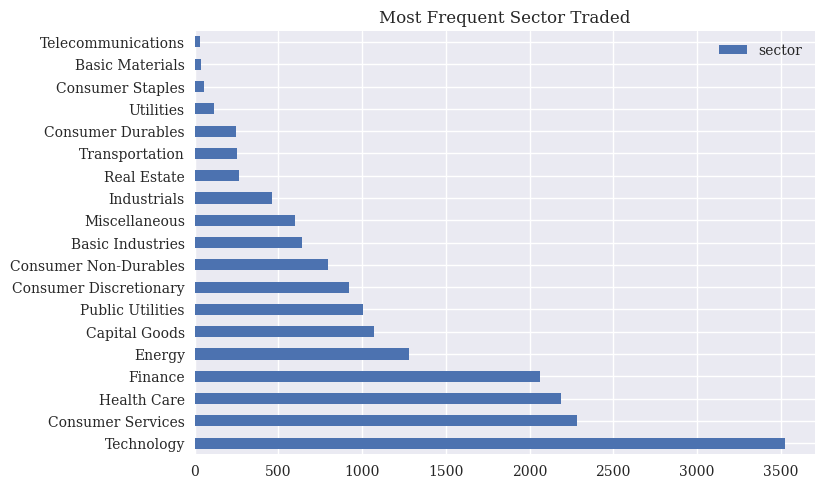

In [241]:
most_frequent_sector.plot.barh(stacked = True, title = 'Most Frequent Sector Traded')

In [244]:
most_frequent_politician = pd.DataFrame(data['representative'].value_counts()).iloc[:25,:]


Text(0.5, 0, 'Number of Trades')

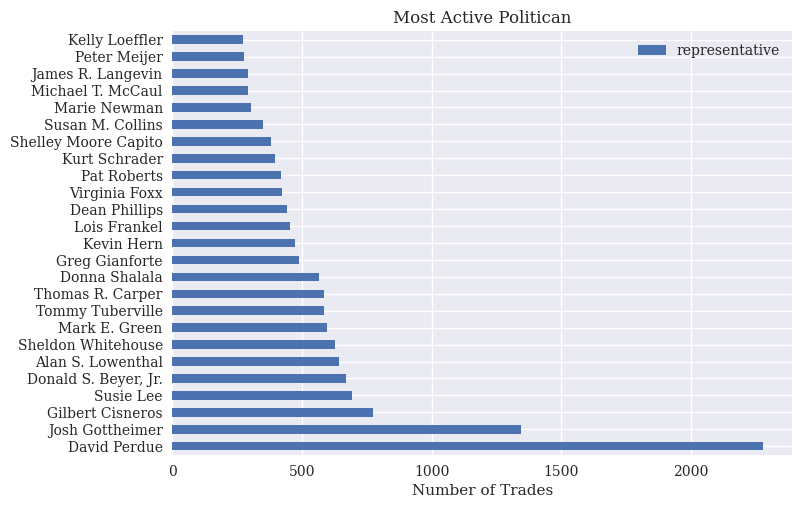

In [249]:
most_frequent_politician.plot.barh(stacked = 'True',title = 'Most Active Politican')
plt.xlabel('Number of Trades')
plt.legend()



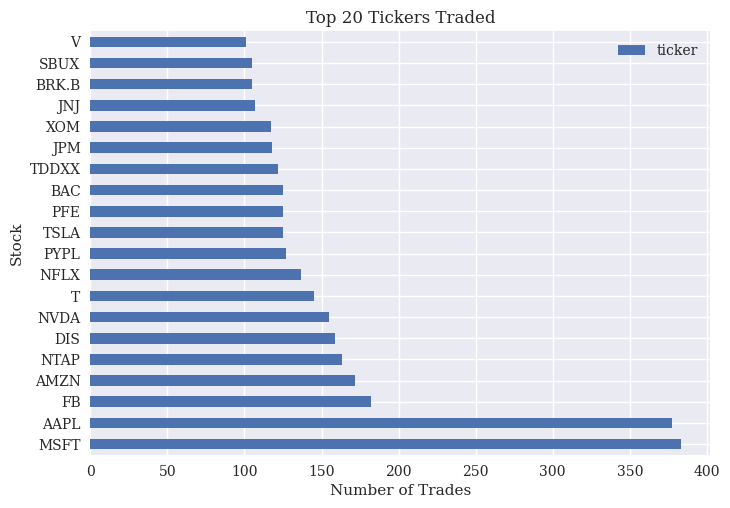

In [100]:
most_frequent_tickers.plot.barh(stacked = True, title = 'Top 20 Tickers Traded')
plt.xlabel('Number of Trades')
plt.ylabel('Stock')
plt.savefig('top_20_tickers_trade.png')


# Downloading Quandl Data

In [61]:
import quandl
apikey = 'J_fXGeVW_zC6RaDeJSQv'
quandl.ApiConfig.api_key = apikey

In [63]:
period_begin = '2004-01-01'
end_date = data.index[-1]


In [323]:
market = quandl.get_table('QUOTEMEDIA/PRICES', ticker = 'SPY',qopts = {'columns' : ['adj_close','date']}, date = {'gte':period_begin,'lte':end_date}).set_index('date').sort_index()
MARKET_RETURNS = market.resample('M').first().pct_change()
MARKET_RETURNS.columns = ['MKT_RETS']
corporate_bond_yields = quandl.get(['FED/RIMLPBAAR_N_B', 'FED/RIMLPAAAR_N_B'], start_date = period_begin, end_date = end_date)*(1/100)
corporate_bond_yields.columns = ['BAA_Yield','AAA_Yield']
corporate_bond_yields['dsspread'] = corporate_bond_yields['BAA_Yield'] - ['AAA_Yield']
corporate_bond_yields = corporate_bond_yields.resample('M').first()
interest_rates = quandl.get('YC/USA', start_date = period_begin,end_date = end_date)[['1-Month','3-Month','10-Year']]*(1/100)
interest_rates['term_spread'] = interest_rates['10-Year']-interest_rates['3-Month']
interest_rates = interest_rates.resample('M').first()
spy_earnings_yield = quandl.get('MULTPL/SP500_EARNINGS_YIELD_MONTH', start_date = period_begin, end_date = end_date).rename(columns={'Value':'MKT_EPS'})*(1/100)
industrial_production = quandl.get('FRED/IPB50002N',start_date = period_begin, end_date= end_date).rename(columns={'Value':'Industrial_Production'})



In [336]:
spy_earnings_yield.rolling(12).sum() - np.log(market.resample('M').first())

,MKT_EPS,adj_close
2004-01-01,NaN,NaN
2004-01-31,NaN,NaN
2004-02-01,NaN,NaN
2004-02-29,NaN,NaN
2004-03-01,NaN,NaN
...,...,...
2022-12-31,NaN,NaN
2023-01-01,NaN,NaN
2023-01-31,NaN,NaN
2023-02-01,NaN,NaN


In [344]:
spy_earnings_yield

,MKT_EPS
Date,
2004-01-01,0.0440
2004-02-01,0.0445
2004-03-01,0.0463
2004-04-01,0.0471
2004-05-01,0.0497
...,...
2022-11-30,0.0471
2022-12-01,0.0478
2023-01-01,0.0474


In [345]:
spy_earnings_yield.resample('M').last()

,MKT_EPS
Date,
2004-01-31,0.0440
2004-02-29,0.0445
2004-03-31,0.0463
2004-04-30,0.0471
2004-05-31,0.0497
...,...
2022-10-31,0.0497
2022-11-30,0.0471
2022-12-31,0.0478


In [341]:
industrial_production.index

DatetimeIndex(['2004-01-01', '2004-02-01', '2004-03-01', '2004-04-01',
               '2004-05-01', '2004-06-01', '2004-07-01', '2004-08-01',
               '2004-09-01', '2004-10-01',
               ...
               '2021-04-01', '2021-05-01', '2021-06-01', '2021-07-01',
               '2021-08-01', '2021-09-01', '2021-10-01', '2021-11-01',
               '2021-12-01', '2022-01-01'],
              dtype='datetime64[ns]', name='Date', length=217, freq=None)

In [339]:
np.log(market.resample('M').first())

,adj_close
date,
2004-01-31,4.343473
2004-02-29,4.367808
2004-03-31,4.386842
2004-04-30,4.369690
2004-05-31,4.355261
...,...
2022-10-31,5.899663
2022-11-30,5.947360
2022-12-31,6.005110


<AxesSubplot:xlabel='Date'>

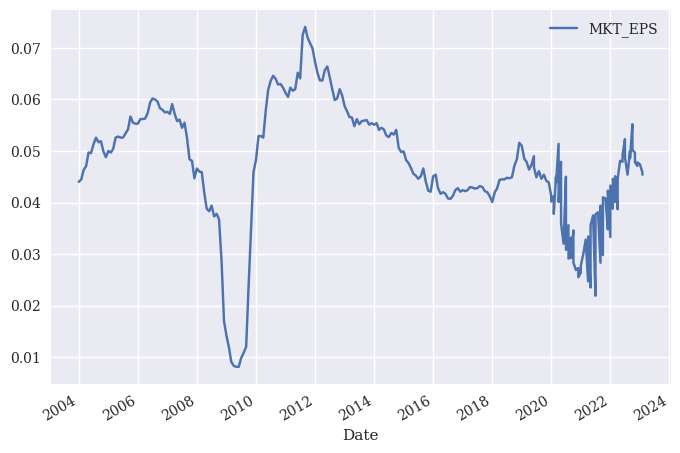

In [286]:
spy_earnings_yield.plot()

In [92]:
data_copy = data.copy()

In [93]:
def filter_trade_type(trade_type:str):
    if trade_type == 'Purchase':
        trade_type = 'Buy'
    elif trade_type == 'purchase':
        trade_type = 'Buy'
    elif trade_type == 'sale':
        trade_type = 'Sell'
    elif trade_type == 'Sale (Partial)':
        trade_type = 'Sell'
    elif trade_type == 'sale_partial':
        trade_type = 'Sell'
    elif trade_type == 'Sale (Full)':
        trade_type = 'Sell'
    elif trade_type == 'sale_full':
        trade_type = 'Sell'
    return trade_type

In [95]:
data_copy['type']  = data_copy['type'].apply(filter_trade_type)

In [96]:
data_copy = data_copy[(data_copy.type == "Buy")|(data_copy.type == "Sell")]

In [156]:
data_copy.head(5)

,disclosure_date,transaction_date,ticker,asset_description,type,amount,representative,party,state,industry,sector
disclosure_date,,,,,,,,,,,
2014-01-31,2014-01-31,1/24/2014,GE,General Electric Company (NYSE),Sell,"$1,001 - $15,000",Susan M. Collins,Republican,ME,Consumer Electronics/Appliances,Energy
2014-01-31,2014-01-31,1/24/2014,CRM,"Salesforce.com, Inc (NYSE)",Buy,"$1,001 - $15,000",Susan M. Collins,Republican,ME,Computer Software: Prepackaged Software,Technology
2014-01-31,2014-01-31,1/24/2014,FB,"Facebook, Inc. (NASDAQ)",Buy,"$1,001 - $15,000",Susan M. Collins,Republican,ME,"Computer Software: Programming, Data Processing",Technology
2014-01-31,2014-01-31,1/28/2014,EBAY,eBay Inc. (NASDAQ),Sell,"$1,001 - $15,000",Susan M. Collins,Republican,ME,Business Services,Miscellaneous
2014-01-31,2014-01-31,1/29/2014,C,"Citigroup, Inc. (NYSE)",Sell,"$1,001 - $15,000",Susan M. Collins,Republican,ME,Major Banks,Finance


- Constructing PTI **Person-Based-Trading Index**

In [139]:
PTI_df = data_copy[['transaction_date','ticker','type']]

In [140]:
PTI_df.head(3)

,transaction_date,ticker,type
disclosure_date,,,
2014-01-31,1/24/2014,GE,Sell
2014-01-31,1/24/2014,CRM,Buy
2014-01-31,1/24/2014,FB,Buy


In [279]:
buys_sells = PTI_df.pivot_table(index = PTI_df.index, columns='type',values='ticker',aggfunc='count')
buys_sells = buys_sells.fillna(0)
buys_sells['Difference'] = buys_sells['Buy'] - buys_sells['Sell']
buys_sells['No_Trades'] = buys_sells['Buy'] + buys_sells['Sell']
buys_sells['Disclosure_Date']= buys_sells.index


In [236]:
buys_sells.loc['2020-01-20':,:]

type,Buy,Sell,Difference,No_Trades
disclosure_date,,,,
2020-01-20,0.0,12.0,-12.0,12.0
2020-01-23,9.0,9.0,0.0,18.0
2020-01-24,0.0,9.0,-9.0,9.0
2020-01-29,1.0,2.0,-1.0,3.0
2020-01-30,3.0,0.0,3.0,3.0
...,...,...,...,...
2023-02-13,9.0,16.0,-7.0,25.0
2023-02-14,6.0,58.0,-52.0,64.0
2023-02-15,3.0,6.0,-3.0,9.0


In [196]:
buys_sells.loc['2020-01-30']

type
Buy     3.0
Sell    0.0
Name: 2020-01-30 00:00:00, dtype: float64

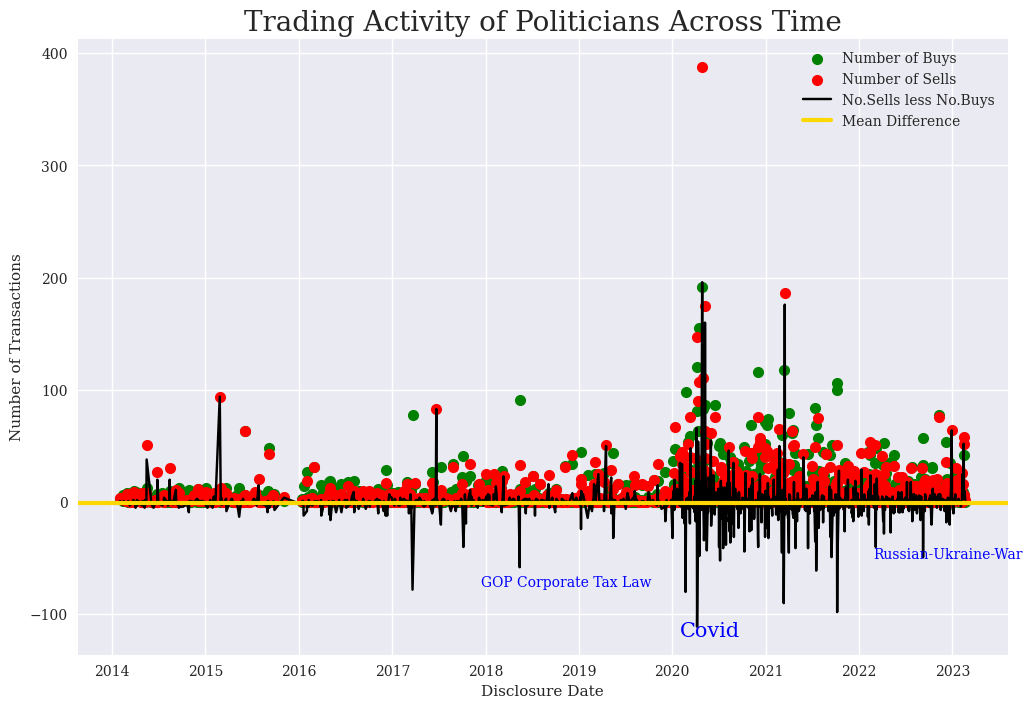

In [254]:
plt.figure(figsize=(12,8))
plt.scatter(buys_sells.index,buys_sells.Buy, c = 'green', label = 'Number of Buys', linewidth = 1)
plt.scatter(buys_sells.index,buys_sells.Sell, c = 'red', label = 'Number of Sells', linewidth = 1)
plt.plot(buys_sells.Sell- buys_sells.Buy,c='black',label= 'No.Sells less No.Buys')
plt.axhline((buys_sells.Sell-buys_sells.Buy).mean(), label = 'Mean Difference', linewidth = 3,color = 'gold')
plt.text(pd.to_datetime('2020-01-30'), -120,'Covid', c ='blue', fontsize = 15)
plt.text(pd.to_datetime('2022-02-24'),-50,'Russian-Ukraine-War', c = 'blue', fontsize = 10)
plt.text(pd.to_datetime('2017-12-15'),-75,'GOP Corporate Tax Law', c = 'blue', fontsize = 10)
plt.legend(loc =0)
plt.xlabel('Disclosure Date')
plt.ylabel('Number of Transactions')
plt.title('Trading Activity of Politicians Across Time', fontsize = 20)
plt.savefig('Trading_Activity.png')




- As you can see from the chart above there are spikes in the **Number of Buys** and **Number of Sells** on any given disclosure date. It begs the question of why? It is human nature that when it comes to money - generally speaking- we are always motiviated in our self interest. Yes, the **STOCK ACT** is *supposed* to prohibit members of Congress and employees of Congress from using priviate information derived from their official positions for their personal benefit. In the court of law, proving such insider trading is probably impossible and not a top priority for the Department of Justice. With that being said, I believe we can find a predictive signal from aggregate *buying* and *selling* activity of United States Politicians. 

- Since politicians are privy to sensitive economic, geopolitical, and other important information before others know, we can get a better understanding of their psychological mindset. *Buying* and *Selling* relate to fear and greed. If politicians know senstive macroeconomic information, they will without a doubt react emotionally through buying and selling out of greed or fear. 
- For example, even though many investors *knew* about Covid-19, **many investors did not know** just how bad it would affect the global economy. However, being that polticians are surrouded by top scientists and the most up-to-date information, they have a better perspective on the gravity of the situation. It would make sense they would trade on this knowledge by selling off assets and raising cash to protect their money. 

- In the following week, month, or even quarter markets will begin to *price-in* this negative sentiment.

In [252]:
data_copy.loc['2020-12-10':,['ticker','type']]

,ticker,type
disclosure_date,,
2020-12-10,AAPL,Sell
2020-12-11,BKNG,Sell
2020-12-11,MU,Buy
2020-12-11,HON,Sell
2020-12-11,CMCSA,Buy
...,...,...
2023-02-17,KO,Sell
2023-02-17,HLI,Sell
2023-02-17,LLY,Sell


In [289]:
buys_sells

type,Buy,Sell,Difference,No_Trades,Disclosure_Date
disclosure_date,,,,,
2014-01-31,3.0,4.0,-1.0,7.0,2014-01-31
2014-02-05,3.0,3.0,0.0,6.0,2014-02-05
2014-02-11,6.0,4.0,2.0,10.0,2014-02-11
2014-02-14,1.0,2.0,-1.0,3.0,2014-02-14
2014-02-25,2.0,1.0,1.0,3.0,2014-02-25
...,...,...,...,...,...
2023-02-13,9.0,16.0,-7.0,25.0,2023-02-13
2023-02-14,6.0,58.0,-52.0,64.0,2023-02-14
2023-02-15,3.0,6.0,-3.0,9.0,2023-02-15


In [302]:
dts = pd.date_range(start = '2014-01-01', end = data.index[-1], freq='D')

In [318]:
MARKET_RETURNS

,MKT_RETS
date,
2004-01-31,NaN
2004-02-29,NaN
2004-03-31,NaN
2004-04-30,-0.018921
2004-05-31,0.000000
...,...
2022-10-31,0.081276
2022-11-30,0.055592
2022-12-31,0.000000


In [322]:
market.resample('M').last().pct_change()

,adj_close
date,
2004-01-31,NaN
2004-02-29,0.013571
2004-03-31,-0.013195
2004-04-30,-0.018921
2004-05-31,0.017123
...,...
2022-10-31,0.081276
2022-11-30,0.055592
2022-12-31,-0.057577


In [292]:
pd.date_range(start= '2014-01-01', end = data.index[-1], freq = '3MS')

DatetimeIndex(['2014-01-01', '2014-04-01', '2014-07-01', '2014-10-01',
               '2015-01-01', '2015-04-01', '2015-07-01', '2015-10-01',
               '2016-01-01', '2016-04-01', '2016-07-01', '2016-10-01',
               '2017-01-01', '2017-04-01', '2017-07-01', '2017-10-01',
               '2018-01-01', '2018-04-01', '2018-07-01', '2018-10-01',
               '2019-01-01', '2019-04-01', '2019-07-01', '2019-10-01',
               '2020-01-01', '2020-04-01', '2020-07-01', '2020-10-01',
               '2021-01-01', '2021-04-01', '2021-07-01', '2021-10-01',
               '2022-01-01', '2022-04-01', '2022-07-01', '2022-10-01',
               '2023-01-01'],
              dtype='datetime64[ns]', freq='3MS')

In [315]:
DATA_MATRIX = pd.DataFrame(data = None, index = dts )



In [313]:
DATA_MATRIX.merge(MARKET_RETURNS,right_index=True,lef)

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False